Name-Sarthak Narang, 
Group- 3COE19, 
Roll No- 102003627

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

### Question 1

In [ ]:
iris_data = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris_data['data'], iris_data['target']], columns=iris_data['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.loc[(iris_df["target"])>0] = 1

In [ ]:
iris_df["target"].unique()

array([0., 1.])

In [ ]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

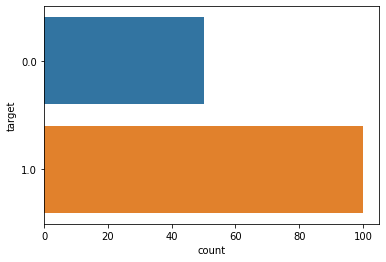

In [ ]:
sns.countplot(y=iris_df.iloc[:,4], data=iris_df)

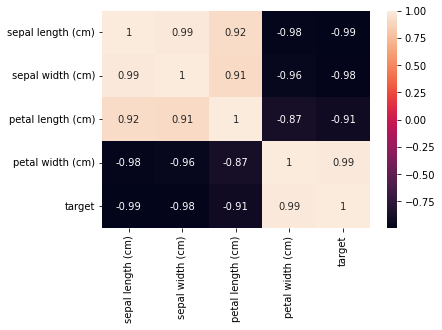

In [ ]:
sns.heatmap(iris_df.corr(), annot=True)

In [ ]:
X = iris_df.drop("target", axis=1)
Y = iris_df.iloc[:,4]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (105, 5)
x_test.shape =  (45, 5)
y_train.shape =  (105,)
y_test.shape =  (45,)


In [ ]:
n = 1000
alpha = 0.01
m,k = x_train.shape
beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

[ 0.64222568 -0.92443656 -0.89968101 -0.8190506   0.93144237]


In [ ]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)


True Positive =  26
True Negative =  19
False Positive =  0
False Negative =  0


In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

Accuracy =  1.0
Precision Positive =  1.0
Recall Positive =  1.0
F1_Score Positive =  1.0
Precision Negative =  1.0
Recall Negative =  1.0
F1_Score Negative =  1.0


In [ ]:


macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)

Macro Precision =  1.0
Macro Recall =  1.0
Macro F1_Score =  1.0


In [ ]:
l1 = len(y_test[y_test==0])
l2 = len(y_test[y_test==1])
weighted_precision = (l1*precision_neg + l2*precision_pos)/(l1+l2)
weighted_recall = (l1*recall_neg + l2*recall_pos)/(l1+l2)
weighted_f1_score = (l1*f1_score_neg + l2*f1_score_pos)/(l1+l2)
print("Weighted Precision = ", weighted_precision)
print("Weighted Recall = ", weighted_recall)
print("Weighted F1_Score = ", weighted_f1_score)

Weighted Precision =  1.0
Weighted Recall =  1.0
Weighted F1_Score =  1.0


### Question 2

In [ ]:
headers = ["col1", "col2", "target"]

In [ ]:
exam_df = pd.read_table("/content/exam6.txt", sep=",", names=headers)
exam_df.head()

,col1,col2,target
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [ ]:
exam_df.isna().sum()

col1      0
col2      0
target    0
dtype: int64

In [ ]:
exam_df.describe()

,col1,col2,target
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


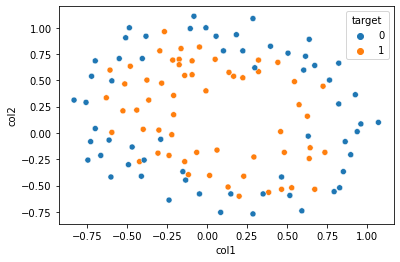

In [ ]:
sns.scatterplot(data=exam_df, x="col1", y="col2", hue="target")

In [ ]:
X = exam_df.drop("target", axis=1)
Y = exam_df.iloc[:,-1]

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled=np.insert(X_scaled,0,values=1,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 6, interaction_only=False, include_bias=False)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [ ]:
print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (82, 83)
x_test.shape =  (36, 83)
y_train.shape =  (82,)
y_test.shape =  (36,)


#### Question 2 Part 1

In [ ]:
n = 1000
alpha = 10
m,k = x_train.shape
beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


[  0.28072924  -3.59443672   0.77039761   0.28072924  -3.59443672
   0.77039761  -1.86237737  -0.0735327    4.31773641   0.28072924
  -3.59443672   0.77039761  -1.86237737  -0.0735327    4.31773641
   3.61031171  13.32989994   1.06291757  -3.65256312   0.28072924
  -3.59443672   0.77039761  -1.86237737  -0.0735327    4.31773641
   3.61031171  13.32989994   1.06291757  -3.65256312  16.03431259
  -2.2554008   -7.63288276  -2.78798506   1.03780114   0.28072924
  -3.59443672   0.77039761  -1.86237737  -0.0735327    4.31773641
   3.61031171  13.32989994   1.06291757  -3.65256312  16.03431259
  -2.2554008   -7.63288276  -2.78798506   1.03780114  -1.85312342
  -7.44662275   3.99239177 -11.88438672  -3.81810431   6.25498723
   0.28072924  -3.59443672   0.77039761  -1.86237737  -0.0735327
   4.31773641   3.61031171  13.32989994   1.06291757  -3.65256312
  16.03431259  -2.2554008   -7.63288276  -2.78798506   1.03780114
  -1.85312342  -7.44662275   3.99239177 -11.88438672  -3.81810431
   6.254987

In [ ]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

True Positive =  11
True Negative =  14
False Positive =  2
False Negative =  9


In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

Accuracy =  0.6944444444444444


In [ ]:
precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

Precision Positive =  0.8461538461538461
Recall Positive =  0.55
F1_Score Positive =  0.6666666666666667
Precision Negative =  0.6086956521739131
Recall Negative =  0.875
F1_Score Negative =  0.6666666666666667


In [ ]:
macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)

Macro Precision =  0.7274247491638797
Macro Recall =  0.7125
Macro F1_Score =  0.6923076923076923


#### Question 2 Part 2


In [ ]:
lambda_val = 0.2
A = x_train.T.dot(x_train)
I = np.identity(A.shape[0])
B = A + lambda_val * I
C = np.linalg.inv(B)
D = C.dot(x_train.T)
beta = D.dot(y_train)

In [ ]:
n = 1000
alpha = 10
m,k = x_train.shape
# beta = np.zeros(k)
for i in range(n):
    cost_gradient = np.zeros(k)
    z = x_train.dot(beta)
    predicted = 1/(1+np.exp(-z))
    difference = predicted - y_train
    for j in range(k):
        cost_gradient[j] = np.sum(difference.dot(x_train[:,j]))
    for j in range(k):
        beta[j] = beta[j] - (alpha/m)*cost_gradient[j]
print(beta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


[  1.80545544  -2.39563398  -0.41599118   1.80545544  -2.39563398
  -0.41599118  -0.4090932   -0.46311724   6.06522759   1.80545544
  -2.39563398  -0.41599118  -0.4090932   -0.46311724   6.06522759
   4.91551045  12.42416606   1.3731632   -4.94668349   1.80545544
  -2.39563398  -0.41599118  -0.4090932   -0.46311724   6.06522759
   4.91551045  12.42416606   1.3731632   -4.94668349  16.85901742
  -2.92235285  -6.4492812   -3.09396815   3.23794329   1.80545544
  -2.39563398  -0.41599118  -0.4090932   -0.46311724   6.06522759
   4.91551045  12.42416606   1.3731632   -4.94668349  16.85901742
  -2.92235285  -6.4492812   -3.09396815   3.23794329  -1.29792627
  -7.1979337    3.41819634 -11.69359872  -3.53381239   3.10430577
   1.80545544  -2.39563398  -0.41599118  -0.4090932   -0.46311724
   6.06522759   4.91551045  12.42416606   1.3731632   -4.94668349
  16.85901742  -2.92235285  -6.4492812   -3.09396815   3.23794329
  -1.29792627  -7.1979337    3.41819634 -11.69359872  -3.53381239
   3.10430

In [ ]:
y_pred = 1/(1+np.exp(-(x_test.dot(beta))))
y_label = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    if(y_pred[i]>=0.5):
        y_label[i]=1

In [ ]:
tp = 0
tn = 0
fp = 0
fn = 0
y_test = np.array(y_test).reshape(-1,1)
for i in range(len(y_label)):
    if(y_test[i]==1 and y_label[i]==1):
        tp+=1
    if(y_test[i]==1 and y_label[i]==0):
        fn+=1
    if(y_test[i]==0 and y_label[i]==0):
        tn+=1
    if(y_test[i]==0 and y_label[i]==1):
        fp+=1

print("True Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

True Positive =  19
True Negative =  11
False Positive =  5
False Negative =  1


In [ ]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy = ", accuracy)

Accuracy =  0.8333333333333334


In [ ]:
precision_pos = tp/(tp+fp)
recall_pos = tp/(tp+fn)
f1_score_pos = 2*precision_pos*recall_pos/(precision_pos+recall_pos)
print("Precision Positive = ", precision_pos)
print("Recall Positive = ", recall_pos)
print("F1_Score Positive = ", f1_score_pos)


precision_neg = tn/(tn+fn)
recall_neg = tn/(tn+fp)
f1_score_neg = 2*precision_neg*recall_neg/(precision_neg+recall_neg)
print("Precision Negative = ", precision_neg)
print("Recall Negative = ", recall_neg)
print("F1_Score Negative = ", f1_score_pos)

Precision Positive =  0.7916666666666666
Recall Positive =  0.95
F1_Score Positive =  0.8636363636363635
Precision Negative =  0.9166666666666666
Recall Negative =  0.6875
F1_Score Negative =  0.8636363636363635


In [ ]:
macro_precision = (precision_pos + precision_neg)/2
macro_recall = (recall_pos + recall_neg)/2
macro_f1_score = (f1_score_pos + f1_score_neg)/2
print("Macro Precision = ", macro_precision)
print("Macro Recall = ", macro_recall)
print("Macro F1_Score = ", macro_f1_score)

Macro Precision =  0.8541666666666666
Macro Recall =  0.81875
Macro F1_Score =  0.8246753246753247
